In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

In [2]:
train_df = pd.read_csv(Path('/Users/mariahconnell/AI-ML-Bootcamp-Jan-2024/02-Homework/10-Intro-Machine-Learning/Instructions/Resources/Generator/2019loans.csv'))
test_df = pd.read_csv(Path('/Users/mariahconnell/AI-ML-Bootcamp-Jan-2024/02-Homework/10-Intro-Machine-Learning/Instructions/Resources/Generator/2020Q1loans.csv'))

In [3]:
# Convert categorical data to numeric and separate target feature for training data
X = train_df.drop('target', axis=1)
X

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,7000.0,0.1894,256.38,MORTGAGE,75000.0,Not Verified,n,28.62,0.0,2.0,...,100.0,87.5,0.0,0.0,352260.0,62666.0,35000.0,10000.0,N,N
1,40000.0,0.1614,975.71,MORTGAGE,102000.0,Source Verified,n,11.72,2.0,0.0,...,85.7,0.0,0.0,0.0,294664.0,109911.0,9000.0,71044.0,N,N
2,11000.0,0.2055,294.81,RENT,45000.0,Verified,n,37.25,1.0,3.0,...,94.3,7.7,0.0,0.0,92228.0,36007.0,33000.0,46328.0,N,N
3,4000.0,0.1612,140.87,MORTGAGE,38000.0,Not Verified,n,42.89,1.0,0.0,...,92.9,100.0,0.0,0.0,284273.0,52236.0,13500.0,52017.0,N,N
4,14000.0,0.1797,505.93,MORTGAGE,43000.0,Source Verified,n,22.16,1.0,0.0,...,84.1,25.0,0.0,0.0,120280.0,88147.0,33300.0,78680.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,19975.0,0.2565,801.09,RENT,28000.0,Not Verified,n,28.42,0.0,0.0,...,100.0,16.7,0.0,0.0,50055.0,28192.0,18700.0,19055.0,N,N
12176,15000.0,0.1774,540.34,RENT,50000.0,Verified,n,23.43,4.0,0.0,...,90.5,11.1,0.0,0.0,70324.0,57025.0,13300.0,54824.0,N,N
12177,3600.0,0.1862,131.28,RENT,60000.0,Not Verified,n,28.80,0.0,1.0,...,100.0,0.0,0.0,0.0,83765.0,55156.0,14800.0,53065.0,N,N
12178,15000.0,0.0881,475.68,MORTGAGE,62000.0,Source Verified,n,11.44,0.0,0.0,...,100.0,0.0,0.0,0.0,189930.0,23748.0,7000.0,32930.0,N,N


In [4]:
X_dummies = pd.get_dummies(X)
print(X_dummies.columns)
X_dummies

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_in

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,7000.0,0.1894,256.38,75000.0,28.62,0.0,2.0,20.0,0.0,40414.0,...,False,True,True,False,True,False,True,False,True,False
1,40000.0,0.1614,975.71,102000.0,11.72,2.0,0.0,10.0,0.0,43531.0,...,False,True,False,True,True,False,True,False,True,False
2,11000.0,0.2055,294.81,45000.0,37.25,1.0,3.0,23.0,0.0,8242.0,...,True,True,False,True,True,False,True,False,True,False
3,4000.0,0.1612,140.87,38000.0,42.89,1.0,0.0,7.0,0.0,12767.0,...,False,True,False,True,False,True,True,False,True,False
4,14000.0,0.1797,505.93,43000.0,22.16,1.0,0.0,22.0,0.0,11182.0,...,False,True,False,True,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,19975.0,0.2565,801.09,28000.0,28.42,0.0,0.0,15.0,0.0,9679.0,...,False,True,False,True,True,False,True,False,True,False
12176,15000.0,0.1774,540.34,50000.0,23.43,4.0,0.0,16.0,0.0,3193.0,...,True,True,False,True,True,False,True,False,True,False
12177,3600.0,0.1862,131.28,60000.0,28.80,0.0,1.0,14.0,0.0,11804.0,...,False,True,False,True,True,False,True,False,True,False
12178,15000.0,0.0881,475.68,62000.0,11.44,0.0,0.0,5.0,0.0,157.0,...,False,True,False,True,False,True,True,False,True,False


In [5]:
# Convert categorical data to numeric and separate target feature for testing data
X_test = test_df.drop('target', axis=1)
X_test

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,40000.0,0.1033,856.40,RENT,128700.0,Source Verified,n,12.47,0.0,1.0,...,84.2,57.1,0.0,0.0,63915.0,49510.0,49400.0,14515.0,Y,N
1,24450.0,0.1430,572.72,MORTGAGE,44574.0,Not Verified,n,15.05,0.0,1.0,...,100.0,0.0,0.0,0.0,136425.0,19439.0,15500.0,18925.0,N,N
2,13500.0,0.1430,316.23,OWN,60000.0,Not Verified,n,28.72,0.0,0.0,...,100.0,0.0,0.0,0.0,82124.0,65000.0,5400.0,61724.0,Y,N
3,10625.0,0.1774,268.31,RENT,60000.0,Verified,n,15.70,0.0,4.0,...,91.4,20.0,0.0,0.0,54855.0,50335.0,23200.0,26255.0,N,N
4,6375.0,0.1862,232.46,RENT,60000.0,Source Verified,n,35.50,0.0,0.0,...,100.0,75.0,0.0,0.0,90445.0,56541.0,15300.0,72345.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,30000.0,0.1240,673.42,RENT,140480.0,Source Verified,n,15.74,0.0,0.0,...,100.0,28.6,0.0,0.0,159688.0,110873.0,48400.0,107388.0,N,N
4698,24000.0,0.0756,747.22,RENT,50000.0,Not Verified,n,26.81,0.0,0.0,...,100.0,0.0,0.0,0.0,62375.0,18928.0,13300.0,30775.0,N,N
4699,10000.0,0.2305,387.36,RENT,33000.0,Verified,n,38.51,0.0,2.0,...,100.0,0.0,0.0,0.0,43250.0,33022.0,8500.0,29550.0,N,N
4700,8000.0,0.1862,205.86,RENT,38000.0,Source Verified,n,16.36,0.0,1.0,...,95.0,0.0,1.0,0.0,31357.0,19595.0,1500.0,9657.0,N,N


In [6]:
X_test_dummies = pd.get_dummies(X_test)
print(X_test_dummies.columns)
X_test_dummies

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_in

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N
0,40000.0,0.1033,856.40,128700.0,12.47,0.0,1.0,8.0,0.0,38113.0,...,True,False,True,False,True,True,False,False,True,True
1,24450.0,0.1430,572.72,44574.0,15.05,0.0,1.0,6.0,0.0,1665.0,...,False,False,True,False,True,True,False,True,False,True
2,13500.0,0.1430,316.23,60000.0,28.72,0.0,0.0,8.0,0.0,13857.0,...,False,False,True,False,True,True,False,False,True,True
3,10625.0,0.1774,268.31,60000.0,15.70,0.0,4.0,17.0,0.0,6216.0,...,False,True,True,False,True,True,False,True,False,True
4,6375.0,0.1862,232.46,60000.0,35.50,0.0,0.0,13.0,0.0,12681.0,...,True,False,True,False,True,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,30000.0,0.1240,673.42,140480.0,15.74,0.0,0.0,20.0,0.0,23215.0,...,True,False,True,True,False,True,False,True,False,True
4698,24000.0,0.0756,747.22,50000.0,26.81,0.0,0.0,9.0,0.0,459.0,...,False,False,True,False,True,True,False,True,False,True
4699,10000.0,0.2305,387.36,33000.0,38.51,0.0,2.0,7.0,0.0,6342.0,...,False,True,True,True,False,True,False,True,False,True
4700,8000.0,0.1862,205.86,38000.0,16.36,0.0,1.0,8.0,1.0,11636.0,...,True,False,True,False,True,True,False,True,False,True


In [7]:
# add missing dummy variables to testing set
training_columns = X_dummies.columns
X_test_dummies = X_test_dummies.reindex(columns = training_columns, fill_value=0)
X_test_dummies

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,40000.0,0.1033,856.40,128700.0,12.47,0.0,1.0,8.0,0.0,38113.0,...,False,True,False,True,True,False,False,True,True,0
1,24450.0,0.1430,572.72,44574.0,15.05,0.0,1.0,6.0,0.0,1665.0,...,False,True,False,True,True,False,True,False,True,0
2,13500.0,0.1430,316.23,60000.0,28.72,0.0,0.0,8.0,0.0,13857.0,...,False,True,False,True,True,False,False,True,True,0
3,10625.0,0.1774,268.31,60000.0,15.70,0.0,4.0,17.0,0.0,6216.0,...,True,True,False,True,True,False,True,False,True,0
4,6375.0,0.1862,232.46,60000.0,35.50,0.0,0.0,13.0,0.0,12681.0,...,False,True,False,True,True,False,True,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,30000.0,0.1240,673.42,140480.0,15.74,0.0,0.0,20.0,0.0,23215.0,...,False,True,True,False,True,False,True,False,True,0
4698,24000.0,0.0756,747.22,50000.0,26.81,0.0,0.0,9.0,0.0,459.0,...,False,True,False,True,True,False,True,False,True,0
4699,10000.0,0.2305,387.36,33000.0,38.51,0.0,2.0,7.0,0.0,6342.0,...,True,True,True,False,True,False,True,False,True,0
4700,8000.0,0.1862,205.86,38000.0,16.36,0.0,1.0,8.0,1.0,11636.0,...,False,True,False,True,True,False,True,False,True,0


In [8]:
#refit X_test to X_test_dummies
X_test = X_test.reindex(columns = training_columns, fill_value=0)
X_test

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,40000.0,0.1033,856.40,128700.0,12.47,0.0,1.0,8.0,0.0,38113.0,...,0,0,0,0,0,0,0,0,0,0
1,24450.0,0.1430,572.72,44574.0,15.05,0.0,1.0,6.0,0.0,1665.0,...,0,0,0,0,0,0,0,0,0,0
2,13500.0,0.1430,316.23,60000.0,28.72,0.0,0.0,8.0,0.0,13857.0,...,0,0,0,0,0,0,0,0,0,0
3,10625.0,0.1774,268.31,60000.0,15.70,0.0,4.0,17.0,0.0,6216.0,...,0,0,0,0,0,0,0,0,0,0
4,6375.0,0.1862,232.46,60000.0,35.50,0.0,0.0,13.0,0.0,12681.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,30000.0,0.1240,673.42,140480.0,15.74,0.0,0.0,20.0,0.0,23215.0,...,0,0,0,0,0,0,0,0,0,0
4698,24000.0,0.0756,747.22,50000.0,26.81,0.0,0.0,9.0,0.0,459.0,...,0,0,0,0,0,0,0,0,0,0
4699,10000.0,0.2305,387.36,33000.0,38.51,0.0,2.0,7.0,0.0,6342.0,...,0,0,0,0,0,0,0,0,0,0
4700,8000.0,0.1862,205.86,38000.0,16.36,0.0,1.0,8.0,1.0,11636.0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Train the Logistic Regression model on the unscaled data and print the model score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Encode the target variable for both training and testing sets
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df['target'])
y_test = label_encoder.transform(test_df['target'])

# Split the data into training and testing sets for features
X_train, _, y_train, _ = train_test_split(X_dummies, y_train, test_size = None, random_state=1)
# Use test_size=0.0 to avoid splitting X_train

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Now, evaluate the model on X_test_dummies
accuracy = model.score(X_test_dummies, y_test)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("X_test_dummies shape:", X_test_dummies.shape)
print("Accuracy on test set:", accuracy)

X_train shape: (9135, 92)
y_train shape: (9135,)
y_test shape: (4702,)
X_test_dummies shape: (4702, 92)
Accuracy on test set: 0.5078689919183327


/Users/mariahconnell/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
X_train.flags

<Flags(allows_duplicate_labels=True)>

k: 1, Train/Test Score: 1.000/0.501
k: 3, Train/Test Score: 0.761/0.508
k: 5, Train/Test Score: 0.706/0.503
k: 7, Train/Test Score: 0.676/0.507
k: 9, Train/Test Score: 0.655/0.504
k: 11, Train/Test Score: 0.647/0.507
k: 13, Train/Test Score: 0.637/0.511
k: 15, Train/Test Score: 0.631/0.510
k: 17, Train/Test Score: 0.631/0.511
k: 19, Train/Test Score: 0.618/0.511


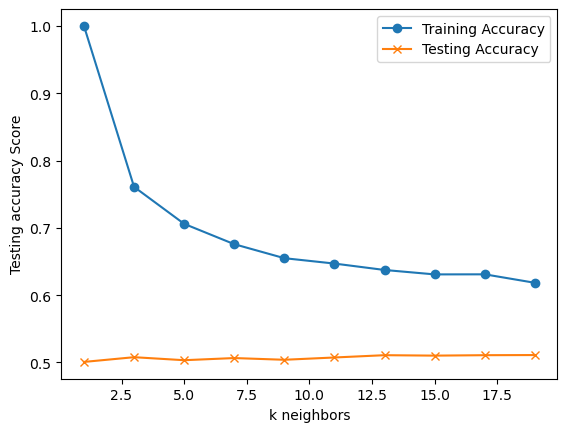

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train.values, y_train)
    train_score = knn.score(X_train.values, y_train)
    test_score = knn.score(X_test.values, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o', label='Training Accuracy')
plt.plot(range(1, 20, 2), test_scores, marker='x', label='Testing Accuracy')
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.legend()
plt.show()

In [12]:
# Scale the data
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler() model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
# Train the Logistic Regression model on the scaled data and print the model score
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Now, evaluate the model on X_test_dummies
accuracy = model.score(X_test_scaled, y_test)

print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.5546575925138238


/Users/mariahconnell/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


k: 1, Train/Test Score: 1.000/0.525
k: 3, Train/Test Score: 0.785/0.550
k: 5, Train/Test Score: 0.737/0.550
k: 7, Train/Test Score: 0.718/0.549
k: 9, Train/Test Score: 0.701/0.555
k: 11, Train/Test Score: 0.696/0.556
k: 13, Train/Test Score: 0.689/0.556
k: 15, Train/Test Score: 0.684/0.559
k: 17, Train/Test Score: 0.679/0.567
k: 19, Train/Test Score: 0.668/0.573


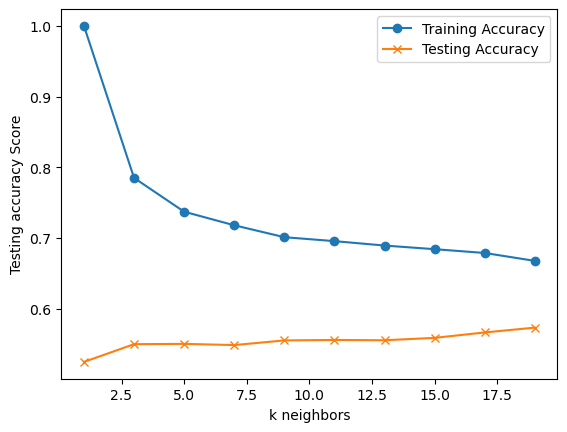

In [15]:
# Train a K-Nearest Neighbors model on the scaled data and print the model score

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o', label='Training Accuracy')
plt.plot(range(1, 20, 2), test_scores, marker='x', label='Testing Accuracy')
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.legend()
plt.show()